In [1]:
import PyDSTool as dst
import numpy as np
from matplotlib import pyplot as plt

LP Point found 
LP Point found 


(0.0, 2.0)

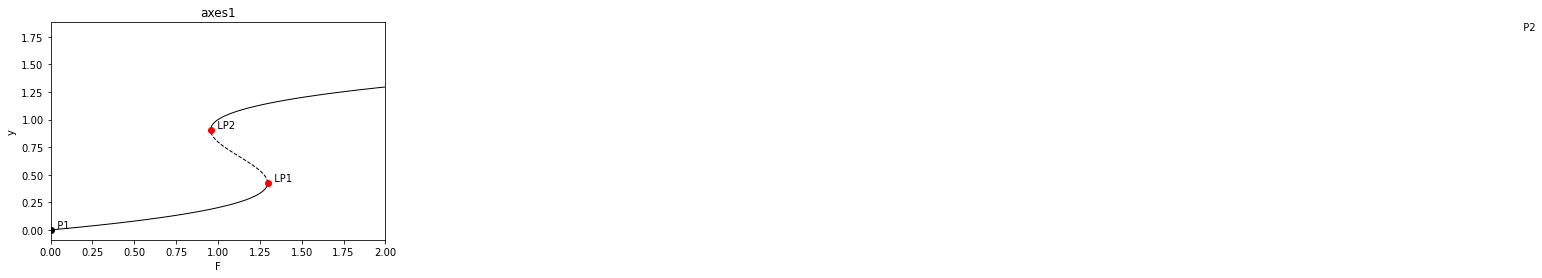

In [2]:
#1) - Bifurcation diagram - PyDSTool is rather fiddly so I have had to do each bifurcation plot separately
#(tried to do at the same time but kept running into strange errors and couldn;t figure out why!)
# Name the model
DSargs = dst.args(name='Stommel model')

#FIRST ONE IF FOR F VS Y

#Set initial condition values for later and parameters
y0 = 0.1
mu=np.sqrt(6.2)

# parameters
DSargs.pars = { 'mu': mu,
               'F': 1.1}

# rhs of the differential equation - ie sole for variable y in the following dy/dt
DSargs.varspecs = {'y': '( F - y * (1+(mu**2)*((1-y)**2)))'}


# initial conditions
DSargs.ics      = {'y': y0}

DSargs.tdomain = [0,10]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.

# Prepare the system to start close to a steady state - When F=0, y=0
ode.set(pars = {'F': 0, 'mu': np.sqrt(6.2)} )       # Lower bound of the control parameter 'i'
ode.set(ics =  {'y': 0})
PC = dst.ContClass(ode)            # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['F'] # control parameter(s) (it should be among those specified in DSargs.pars)

#The values in the next 4 lines were the cause of all the errors, and it seems completely arbitrary
#what you choose for them
PCargs.MaxNumPoints = 500                   # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 2e-2
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches

#Plot bifurcation result
PC.newCurve(PCargs)
PC['EQ1'].forward()
PC.display(['F','y'], stability=True,figure=1) 
plt.xlim(0,2)

LP Point found 
LP Point found 


(0.0, 2.0)

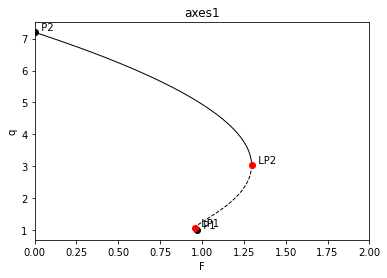

In [440]:
#NOW WE DO FOR F VS q = (1 + mu*(1-y)**2)
DSargs = dst.args(name='Stommel model')

y0 = 0.1
mu=6.2
w_ics = 1 + mu*((1-y0)**2)
DSargs.pars = { 'mu': mu,
               'F': 1.1}

#Write a function which converts y into q
DSargs.fnspecs  = {'ytoq': (['q'], '1 - sqrt((q-1)/(mu**2))') }

# rhs of the differential equation, reform it into dq/dt = dq/dy * dy/dt
DSargs.varspecs = {'q': '-2*(mu**2)*(1-ytoq(q)) * (F - ytoq(q)*q)'}

# initial conditions
DSargs.ics      = {'q': w_ics}

DSargs.tdomain = [0,30]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.

# Prepare the system to start close to a steady state: This one was a bit strange as I applied F = 0, y=0 -> q=7.2,
# and it seemed to work so rolling with it. F=0 -> q=0 ->y y is imaginary and when I tried that it didn't work so
# sticking with the original
ode.set(pars = {'F': 0, 'mu': np.sqrt(6.2)} )       # Lower bound of the control parameter 'i'
ode.set(ics =  {'q': 7.2})
PC = dst.ContClass(ode)            # Set up continuation class

PCargs = dst.args(name='EQ2', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['F']                    # control parameter(s) (it should be among those specified in DSargs.pars)

#Here is when I started to get the errors a lot when varying step sizes etc, doesn;t seem to like it for some reason
PCargs.MaxNumPoints = 650                   # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 1e-2
PCargs.MinStepSize  = 1e-2
PCargs.StepSize     = 1e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches

#Plot results
PC.newCurve(PCargs)
PC['EQ2'].backward()
PC.display(['F','q'], stability=True,figure=1) 
plt.xlim(0,2)

In [432]:
PC['EQ2'].info()

PyCont curve EQ2 (type EP-C)
Using model: Stommel model

Model Info
---------- 

  Variables : q
  Parameters: mu, F

Continuation Parameters
----------------------- 

name  =  EQ2
auxpars  =  []
freepars  =  ['F']
MaxNumPoints  =  650
MaxCorrIters  =  5
MaxTestIters  =  10
MaxStepSize  =  0.01
MinStepSize  =  0.01
StepSize  =  0.01
VarTol  =  1e-06
FuncTol  =  1e-06
TestTol  =  0.0001
LocBifPoints  =  ['LP']
verbosity  =  1
ClosedCurve  =  50
SaveJacobian  =  False
SaveEigen  =  True
Corrector  =  <bound method Continuation._MoorePenrose of PyCont curve EQ2 (type EP-C)>
UseAuto  =  False
StopAtPoints  =  []
SPOut  =  None


Special Points
-------------- 

P1, P2, LP1, LP2
